# Electric Vehicle Competitive Landscape Analysis: Modeling

The purpose of this notebook is to is create a linear regression model thats predicts what the MSRP price of each vehicle should be, and then contrast that with the actual MSRP values in the dataset to determine which models are overpriced compared to the market.

Based on our analysis so far, we should expect that Tesla will have the lowest ratio of their lineup being overpriced, while BMW will most likely have the highest ratio.

Let's find out:

---

## Load Modules & Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('EV_Data_Model.csv')
df

,Make,Model,Type,MSRP,Range_(mi),0-60mph
0,Tesla,Model 3 Base,Sedan,"$38,990",272,5.8
1,Tesla,Model 3 Long Range,Sedan,"$47,740",341,4.2
2,Tesla,Model 3 Performance,Sedan,"$53,990",296,2.9
3,Tesla,Model Y RWD,Crossover SUV,"$44,990",320,6.5
4,Tesla,Model Y AWD,Crossover SUV,"$47,990",310,4.8
5,Tesla,Model Y Performance,Crossover SUV,"$51,490",279,3.5
6,Tesla,Model S AWD,Luxury Sedan,"$72,990",402,3.1
7,Tesla,Model S Plaid,Luxury Sedan,"$87,990",359,2.0
8,Tesla,Model X AWD,Luxury SUV,"$77,990",335,3.8
9,Tesla,Model X Plaid,Luxury SUV,"$92,990",326,2.5


---

## Pre-Processing

In [3]:
# Remove dollar signs and commas from the MSRP column and convert to numeric
df['MSRP'] = df['MSRP'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Define the features and target variable
features = ['Type', 'Range_(mi)', '0-60mph']
target = 'MSRP'

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing for the 'Type' feature (one-hot encoding)
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ['Type']),
    ],
    remainder='passthrough'
)

# Create a pipeline for preprocessing and training
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

---

## Modeling

In [4]:
# Train the model
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate mean absolute error and R2 score
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): ${mae:.0f}")
print(f"R2 Score: {r2:.3f}")

Mean Absolute Error (MAE): $11223
R2 Score: 0.786


- These results indicate that, on average, the predicted MSRP values are about $11,223 off from the actual MSRP values. This is actually a reasonable amount to expect since there was a high variance in the MSRP values in our dataset.
- We also saw that some EV models offered very good value for money while others offered very bad value for money, so we expect the MAE score to refelct the fact that some models are underpriced and others are overpriced compared to the market.
- The R2 score suggests a relatively good fit of the model to the data, showing that it explains about 78.6% of the variance in MSRP.

Next, let's check how the predicted MSRP compares with the actual MSRP for the vehicles in our test set:

In [5]:
# Create a DataFrame to show model names, actual, and predicted prices
test_results = X_test.copy()
test_results['Actual MSRP'] = y_test
test_results['Predicted MSRP'] = y_pred
test_results.reset_index(inplace=True)

# Merge with the original DataFrame to retrieve model names and other information
full_results = test_results.merge(df[['Make', 'Model']], left_on='index', right_index=True)
full_results = full_results[['Make', 'Model', 'Actual MSRP', 'Predicted MSRP']]

# Format the MSRP columns to display as dollar amounts rounded to the nearest dollar
full_results['Actual MSRP'] = full_results['Actual MSRP'].apply(lambda x: f"${int(round(x, 0)):,}")
full_results['Predicted MSRP'] = full_results['Predicted MSRP'].apply(lambda x: f"${int(round(x, 0)):,}")

full_results

,Make,Model,Actual MSRP,Predicted MSRP
0,BMW,i7 M70,"$168,500","$121,306"
1,Nissan,Ariya Engage+ e-4ORCE,"$51,190","$52,308"
2,BMW,i4 xDrive40,"$61,600","$51,754"
3,BMW,i5 M60,"$84,100","$78,487"
4,Nissan,Ariya Platinum+ e-4ORCE,"$60,190","$52,501"
5,BMW,iX xDrive50,"$87,250","$90,264"
6,Ford,Mustang Mach-E Base,"$39,995","$50,148"
7,Nissan,Ariya Venture+,"$47,190","$42,031"


Now, let's run cross-validation on our dataset to get MSRP comparisons for all EV models:

In [6]:
# Initialize KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)
all_results = []

# Perform cross-validation and collect results
for train_index, test_index in kf.split(df):
    X_train, X_test = df.iloc[train_index][features], df.iloc[test_index][features]
    y_train, y_test = df.iloc[train_index][target], df.iloc[test_index][target]
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    fold_results = pd.DataFrame({
        'Make': df.iloc[test_index]['Make'],
        'Model': df.iloc[test_index]['Model'],
        'Actual MSRP': y_test,
        'Predicted MSRP': y_pred
    }).reset_index(drop=True)
    all_results.append(fold_results)

# Combine all results
final_results = pd.concat(all_results).reset_index(drop=True)

# Sort by Make and then by Actual MSRP numerically
sort_order = ['Tesla', 'Nissan', 'Chevrolet', 'Ford', 'BMW']
final_results['Make'] = pd.Categorical(final_results['Make'], categories=sort_order, ordered=True)
final_results.sort_values(['Make', 'Actual MSRP'], inplace=True)

# Add pricing label and formatting after sorting
final_results['Actual MSRP'] = final_results['Actual MSRP'].apply(lambda x: f"${x:,.0f}")
final_results['Predicted MSRP'] = final_results['Predicted MSRP'].apply(lambda x: f"${x:,.0f}")

final_results.style.hide(axis='index')

Make,Model,Actual MSRP,Predicted MSRP
Tesla,Model 3 Base,"$38,990","$52,883"
Tesla,Model Y RWD,"$44,990","$45,546"
Tesla,Model 3 Long Range,"$47,740","$57,164"
Tesla,Model Y AWD,"$47,990","$50,535"
Tesla,Model Y Performance,"$51,490","$63,327"
Tesla,Model 3 Performance,"$53,990","$69,034"
Tesla,Model S AWD,"$72,990","$69,801"
Tesla,Model X AWD,"$77,990","$97,786"
Tesla,Model S Plaid,"$87,990","$80,593"
Tesla,Model X Plaid,"$92,990","$104,232"


Looks like our intuitions are being proven correct, Tesla's models seem  to be underpriced while BMW's models tend to be overpriced.

Let's add a new column which will make it easier to visualize:

In [7]:
# Function to determine if a car is overpriced or underpriced based on actual and predicted MSRP
def pricing_label(actual, predicted):
    return "Underpriced" if actual < predicted else "Overpriced"

# Convert formatted currency strings back to floats for calculation
final_results['Actual MSRP'] = final_results['Actual MSRP'].replace({'\$': '', ',': ''}, regex=True).astype(float)
final_results['Predicted MSRP'] = final_results['Predicted MSRP'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Apply the pricing label function using numeric values
final_results['Pricing'] = final_results.apply(lambda row: pricing_label(row['Actual MSRP'], row['Predicted MSRP']), axis=1)

# Convert numeric MSRPs back to formatted currency strings for display
final_results['Actual MSRP'] = final_results['Actual MSRP'].apply(lambda x: f"${x:,.0f}")
final_results['Predicted MSRP'] = final_results['Predicted MSRP'].apply(lambda x: f"${x:,.0f}")

# Apply styling based on the 'Pricing' column for visual display
styled_results = final_results.style.apply(
    lambda x: ["background-color: green" if v == "Underpriced" else "background-color: red" for v in x],
    subset=['Pricing']
).hide(axis='index')

styled_results

Make,Model,Actual MSRP,Predicted MSRP,Pricing
Tesla,Model 3 Base,"$38,990","$52,883",Underpriced
Tesla,Model Y RWD,"$44,990","$45,546",Underpriced
Tesla,Model 3 Long Range,"$47,740","$57,164",Underpriced
Tesla,Model Y AWD,"$47,990","$50,535",Underpriced
Tesla,Model Y Performance,"$51,490","$63,327",Underpriced
Tesla,Model 3 Performance,"$53,990","$69,034",Underpriced
Tesla,Model S AWD,"$72,990","$69,801",Overpriced
Tesla,Model X AWD,"$77,990","$97,786",Underpriced
Tesla,Model S Plaid,"$87,990","$80,593",Overpriced
Tesla,Model X Plaid,"$92,990","$104,232",Underpriced


---

## Results

Let's see how many models for each brand are either overpriced or underpriced:

In [8]:
# Group by 'Make' and 'Pricing' to count the number of Overpriced and Underpriced models for each brand
pricing_count = final_results.groupby(['Make', 'Pricing']).size().unstack(fill_value=0)
pricing_count

Pricing,Overpriced,Underpriced
Make,,
Tesla,2,8
Nissan,4,5
Chevrolet,1,1
Ford,1,2
BMW,7,5


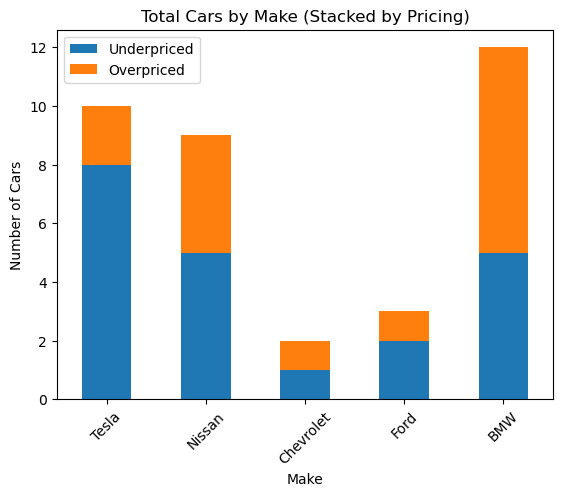

In [9]:
pricing_data = pd.read_csv('Pricing_Data.csv')
# Adjusting the plot to correctly stack the 'Overpriced' on top of 'Underpriced'
fig, ax = plt.subplots()
pricing_data.plot(kind='bar', x='Make', y=['Underpriced', 'Overpriced'], stacked=True, color=['#1f77b4', '#ff7f0e'], ax=ax)
ax.set_xlabel('Make')
ax.set_ylabel('Number of Cars')
ax.set_title('Total Cars by Make (Stacked by Pricing)')
plt.xticks(rotation=45)
plt.legend(['Underpriced', 'Overpriced'])
plt.show()

Now let's calculate the percentage of each car brand's lineup that is overpriced:

In [10]:
# Calculate the total number of cars for each make
total_cars_by_make = pricing_count.sum(axis=1)

# Create a DataFrame with the percentage of overpriced vehicles for each make, rounded and formatted
percentage_overpriced_df = ((pricing_count['Overpriced'] / total_cars_by_make * 100).round().astype(int).astype(str) + '%').reset_index()
percentage_overpriced_df.columns = ['Make', 'Percentage Overpriced']

# Sort by 'Percentage Overpriced' in ascending order
percentage_overpriced_df = percentage_overpriced_df.sort_values('Percentage Overpriced', ascending=True).reset_index(drop=True)

# Reset the index to start at 1
percentage_overpriced_df.index = range(1, len(percentage_overpriced_df) + 1)

# Display the DataFrame
percentage_overpriced_df

,Make,Percentage Overpriced
1,Tesla,20%
2,Ford,33%
3,Nissan,44%
4,Chevrolet,50%
5,BMW,58%


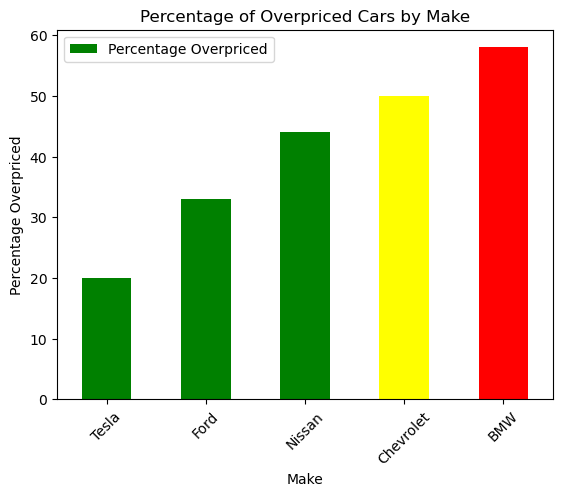

In [11]:
percentage_data = pd.read_csv('Percentage_Overpriced.csv')
# Clean the data by removing the '%' sign and converting to integer
percentage_data['Percentage Overpriced'] = percentage_data['Percentage Overpriced'].replace('%', '', regex=True).astype(int)

# Define colors based on the percentage value
colors = ['green' if x < 50 else 'yellow' if x == 50 else 'red' for x in percentage_data['Percentage Overpriced']]

# Plotting the bar chart with conditional coloring
fig, ax = plt.subplots()
percentage_data.plot(kind='bar', x='Make', y='Percentage Overpriced', color=colors, ax=ax)
ax.set_xlabel('Make')
ax.set_ylabel('Percentage Overpriced')
ax.set_title('Percentage of Overpriced Cars by Make')
plt.xticks(rotation=45)
plt.show()

---

## Conclusion

- Our initial hypothesis that BMW would have the highest percentage of overpriced cars and that Tesla would have the least was confirmed.
- The model performed reasonably well given the small size of the dataset.

---

## Future Improvements

- The main source of improvement would come from increasing the size of the dataset to include many more brands and models to get a better picture of the overall market.
- Adding other features might also help improve the R2 score and explain more of the variance, but that runs the risk of introducing issues with multicollinearity between the variables.